The Dataset is about Wisconsin Diagnostic Breast Cancer (WDBC).
Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

columns 3-32 
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
 Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV,train_test_split

from sklearn.metrics import  confusion_matrix, average_precision_score, classification_report, roc_auc_score

from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df.columns = ['ID number', 'Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [4]:
df.head()

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.shape

(569, 31)

In [4]:
Diagnosis_mapping = {'M':1, 'B':0}
df.Diagnosis = df.Diagnosis.map(Diagnosis_mapping)

In [17]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [5]:
df.drop('ID number', axis=1 , inplace=True)

In [8]:
df_wide = df[['Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']]
df_long = pd.melt(df_wide, id_vars = 'Diagnosis')


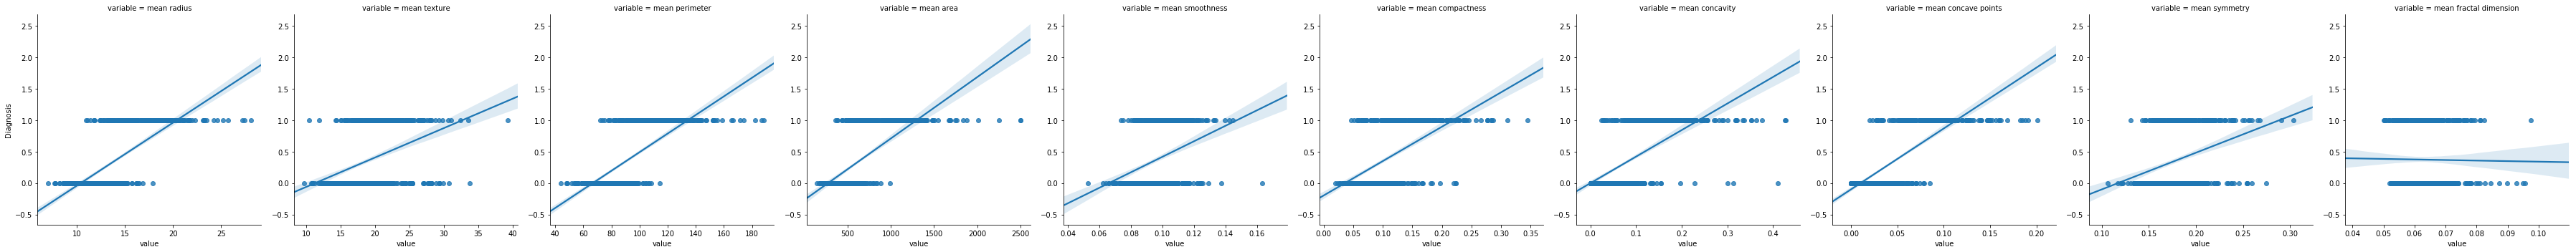

In [9]:
sns.lmplot(data = df_long, x ='value', y = 'Diagnosis', col=  'variable', sharex= False)
plt.show()

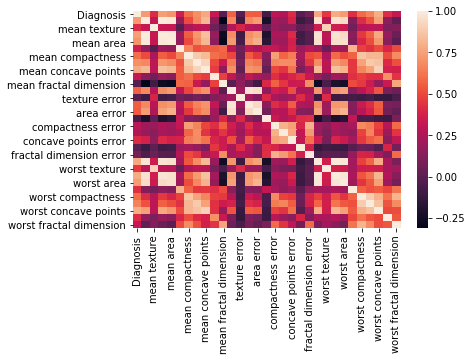

In [10]:
sns.heatmap(df.corr())
plt.show()

In [12]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [6]:
X = df.iloc[:, 1:]
Y = df['Diagnosis']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


# Let's start with Bernoulli

In [18]:
bnb = BernoulliNB()
train_score = cross_val_score(bnb, X_train, Y_train, cv=5)
print('\n  Average cross_val_score on Training Data : ', train_score.mean())
test_score = cross_val_score(bnb, X_test, Y_test, cv=5)
print('\n  Average cross_val_score on Test Data : ', test_score.mean())
roc_score = cross_val_score(bnb, X_test, Y_test, cv=5, scoring = 'roc_auc')
print('\n  Average cross_val_score on ROC AUC : ', roc_score.mean())


  Average cross_val_score on Training Data :  0.629125138427

  Average cross_val_score on Test Data :  0.622477650064

  Average cross_val_score on ROC AUC :  0.527777777778


In [34]:
X = df.iloc[:, 1:]
Y = df['Diagnosis']

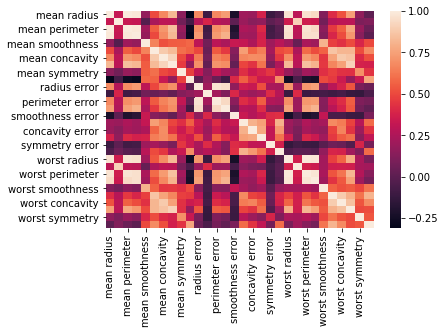

In [35]:
corr_mat = X.corr()
sns.heatmap(corr_mat)
plt.show()

Many features are related to each other. So lets try PCA on this first and again calculate the scores.

In [36]:
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=30)
X_pca = pd.DataFrame(pca.fit_transform(X_std))

print(
    'The percentage of total variance in the dataset explained by each component from Sklearn PCA.\n',
    pca.explained_variance_ratio_.cumsum()
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.44272026  0.63243208  0.72636371  0.79238506  0.84734274  0.88758796
  0.9100953   0.92598254  0.93987903  0.95156881  0.961366    0.97007138
  0.97811663  0.98335029  0.98648812  0.98915022  0.99113018  0.99288414
  0.9945334   0.99557204  0.99657114  0.99748579  0.99829715  0.99889898
  0.99941502  0.99968761  0.99991763  0.99997061  0.99999557  1.        ]


Lets consider we want features which can explain 98% variance

In [37]:
pca = PCA(n_components=15)
X_pca = pd.DataFrame(pca.fit_transform(X_std))

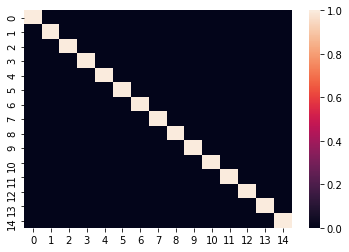

In [38]:
corr_mat = X_pca.corr()
sns.heatmap(corr_mat)
plt.show()

In [39]:
X_train, X_test, Y_train , Y_test = train_test_split(X_pca,Y,test_size=0.2, stratify = Y )
print(X_train.shape)
print(X_test.shape)

(455, 15)
(114, 15)


In [40]:
bnb = BernoulliNB()
bnb_train_score = cross_val_score(bnb, X_train, Y_train, cv=5)
print('\n  Average cross_val_score on Training Data : ', train_score.mean())
bnb_test_score = cross_val_score(bnb, X_test, Y_test, cv=5)
print('\n  Average cross_val_score on Test Data : ', test_score.mean())
bnb_roc_score = cross_val_score(bnb, X_test, Y_test, cv=5, scoring = 'roc_auc')
print('\n  Average cross_val_score on ROC AUC : ', roc_score.mean())


  Average cross_val_score on Training Data :  0.98021978022

  Average cross_val_score on Test Data :  0.966666666667

  Average cross_val_score on ROC AUC :  0.994074074074


The scores of bernoulli Naive Bayes is better now.

# Let's Try LOGISTIC REGRESSION on this.

In [41]:
# LOGISTIC REGRESSION
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)
logreg_train_score = cross_val_score(logreg, X_train, Y_train, cv=5)
print('\n  Average cross_val_score on Training Data : ', train_score.mean())
logreg_test_score = cross_val_score(logreg, X_test, Y_test, cv=5)
print('\n  Average cross_val_score on Test Data : ', test_score.mean())
logreg_roc_score = cross_val_score(logreg, X_test, Y_test, cv=5, scoring = 'roc_auc')
print('\n  Average cross_val_score on ROC AUC : ', roc_score.mean())


  Average cross_val_score on Training Data :  0.98021978022

  Average cross_val_score on Test Data :  0.966666666667

  Average cross_val_score on ROC AUC :  0.994074074074


In [21]:
logreg.intercept_

array([-0.3908732])

In [22]:
logreg.coef_

array([[ 2.57139788, -1.38418695, -0.39693264, -0.48811594, -0.94354927,
        -0.44283434,  0.16272486,  0.59327838,  0.9984217 , -0.49824143,
         0.41279179,  0.09498438, -0.52791376, -0.657804  ,  0.16099921]])

# Lets Try KNN on this.

I am considering the original dataset here, then go for standardization of the features.

In [42]:
X_std = StandardScaler().fit_transform(X)

X_train, X_test, Y_train , Y_test = train_test_split(X_std,Y,test_size=0.2, stratify = Y )
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [24]:
knn = KNeighborsClassifier()
# Set of parameters to test for best score in Grid Search CV
k = np.arange(2,15,1)
parameters = {'n_neighbors':k}

#fitting model and printing best parameters and score from model
grid_knn = GridSearchCV(knn, param_grid=parameters, scoring='roc_auc')
grid_knn.fit(X_train, Y_train)

print('Best Score:', grid_knn.best_score_)
best_params_knn = grid_knn.best_params_
print('Best Parameters:', best_params_knn)

Best Score: 0.992279186978
Best Parameters: {'n_neighbors': 14}



Now that we know what best parameters to use, let's use these parameters for a new KNN model and fit the model to the training data, then test the accuracy of the test set.

In [43]:
knn = KNeighborsClassifier(**best_params_knn)
start_time = datetime.now()
knn_train_score = cross_val_score(knn, X_train, Y_train, cv=5)
knn_test_score = cross_val_score(knn, X_test, Y_test, cv=5)
knn_roc_score = cross_val_score(knn, X_test, Y_test, cv=5,  scoring='roc_auc')

print('Training Data Accuracy: %.2f +/- %.2f' % (knn_train_score.mean(), knn_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (knn_test_score.mean(), knn_test_score.std()))
print('ROC AUC Accuracy: %.2f +/- %.2f' % (knn_roc_score.mean(), knn_roc_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.96 +/- 0.01
Test Data Accuracy: 0.92 +/- 0.04
ROC AUC Accuracy: 0.99 +/- 0.01

Duration :  0:00:00.046861


# Decsion Tree

In [48]:
X = df.iloc[:, 1:]
Y = df['Diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [49]:
start_time = datetime.now()
params = {'max_depth': [3, 4, 5, 6, 7, None],
          'max_features':[1,2,3,4]
         }
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

gs = gs.fit(X_train, Y_train)

print("Duration : ", (datetime.now() - start_time))

print(gs.best_score_)
print(gs.best_params_)

Duration :  0:00:00.359399
0.934272300469
{'max_depth': None, 'max_features': 3}


In [50]:
decision_tree = DecisionTreeClassifier(**gs.best_params_ , random_state=0)
start_time = datetime.now()
decision_tree_train_score = cross_val_score(decision_tree, X_train, Y_train, cv=5)
decision_tree_test_score = cross_val_score(decision_tree, X_test, Y_test, cv=5)
decision_tree_roc_score = cross_val_score(decision_tree, X_test, Y_test, cv=5,  scoring='roc_auc')

print('Training Data Accuracy: %.2f +/- %.2f' % (decision_tree_train_score.mean(), decision_tree_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (decision_tree_test_score.mean(), decision_tree_test_score.std()))
print('ROC AUC Accuracy: %.2f +/- %.2f' % (decision_tree_roc_score.mean(), decision_tree_roc_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.93 +/- 0.01
Test Data Accuracy: 0.91 +/- 0.02
ROC AUC Accuracy: 0.89 +/- 0.02

Duration :  0:00:00.031252


# Try with RandomForest Classifier

In [53]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
start_time = datetime.now()
forest_train_score = cross_val_score(forest, X_train, Y_train, cv=5)
forest_test_score = cross_val_score(forest, X_test, Y_test, cv=5)
forest_roc_score = cross_val_score(forest, X_test, Y_test, cv=5,  scoring='roc_auc')
#print(forest_score)
print('Training Data Accuracy: %.2f +/- %.2f' % (forest_train_score.mean(), forest_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (forest_test_score.mean(), forest_test_score.std()))
print('ROC AUC Accuracy: %.3f +/- %.3f' % (forest_roc_score.mean(), forest_roc_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.96 +/- 0.02
Test Data Accuracy: 0.94 +/- 0.04
ROC AUC Accuracy: 0.999 +/- 0.002

Duration :  0:00:01.981804


Now that we know what best parameters to use, let's use these parameters for a new random forest model and fit the model to the training data, then test the accuracy of the test set.

# Try with Gradient Boosting Classifier

In [62]:
# Set of parameters to test for best score in Grid Search CV

gbc_params = {
    'loss':['deviance','exponential'] ,
    'max_depth':[4, 6,7, 8, None],
    'n_estimators':[50, 100,200, 500],
    'subsample':[0.6,0.8],
    'learning_rate':[0.05,0.1, 0.3]
}
gbc_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=gbc_params)
gbc_grid.fit(X_train, Y_train)

print(gbc_grid.best_score_)
print(gbc_grid.best_params_)

0.969483568075
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6}



Now that we know what best parameters to use, let's use these parameters for a new gradient boosting classifier model and fit the model to the training data, then test the accuracy of the test set.

In [63]:
gbc2 = GradientBoostingClassifier(**gbc_grid.best_params_)
gbc2.fit(X_train, Y_train)

start_time = datetime.now()
gbc_train_score = cross_val_score(gbc2, X_train, Y_train, cv=5)
gbc_test_score = cross_val_score(gbc2, X_test, Y_test, cv=5)
gbc_roc_score = cross_val_score(gbc2, X_test, Y_test, cv=5,  scoring='roc_auc')

print('Training Data Accuracy: %.2f +/- %.2f' % (gbc_train_score.mean(), gbc_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (gbc_test_score.mean(), gbc_test_score.std()))
print('ROC AUC Accuracy: %.2f +/- %.2f' % (gbc_roc_score.mean(), gbc_roc_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.96 +/- 0.02
Test Data Accuracy: 0.94 +/- 0.03
ROC AUC Accuracy: 0.99 +/- 0.00

Duration :  0:00:03.567662


# Model Analysis
Let's take a look at all of the model accuracies in comparison to get a better sense of the best models and then take a closer look at the best model.

In [64]:
score_list = [['Logistic Regression', logreg_train_score.mean() ,  logreg_test_score.mean(), logreg_roc_score.mean()],
             ['KNN', knn_train_score.mean(), knn_test_score.mean(),  knn_roc_score.mean()],
             ['Random Forest', forest_train_score.mean(),  forest_test_score.mean() , forest_roc_score.mean()],
             ['Gradient_Boost', gbc_train_score.mean(), gbc_test_score.mean() , gbc_roc_score.mean()]
             ]
scores_overall = pd.DataFrame(score_list, columns=['Model','Train_Data_Average_Accuracy','Test_Data_Average_Accuracy', 'ROC_AUC_Score'])
scores_overall.sort_values('ROC_AUC_Score', ascending=False)

,Model,Train_Data_Average_Accuracy,Test_Data_Average_Accuracy,ROC_AUC_Score
2,Random Forest,0.957586,0.936909,0.998990
3,Gradient_Boost,0.960022,0.937420,0.994617
1,KNN,0.962637,0.921212,0.993029
0,Logistic Regression,0.978022,0.956818,0.989021


             precision    recall  f1-score   support

          0       0.97      0.99      0.98        89
          1       0.98      0.94      0.96        54

avg / total       0.97      0.97      0.97       143



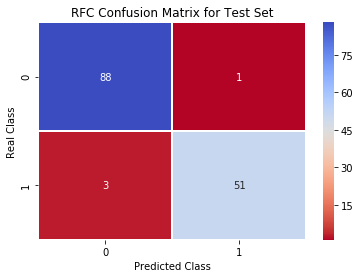

In [65]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

print(classification_report(Y_test, Y_pred))

#Diagnosis_mapping = {'M':1, 'B':0}

# Building confusion matrix
conf_matrix_gbc_test = confusion_matrix(Y_test, Y_pred)
# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_gbc_test,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('RFC Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

The F1-score is the weighted average balance between precision and recall. This takes both the false positives and false negatives into account. Overall, the model was better able to predict for people with benign, though not bad with malignant

# Let's Try the Multilayer perceptron Classifier on this dataset

In [9]:
X_std = StandardScaler().fit_transform(X)

X_train, X_test, Y_train , Y_test = train_test_split(X_std,Y,test_size=0.2, stratify = Y )
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [13]:
start_time = datetime.now()
# Establish and fit the model
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, Y_train)

mlp_train_score = cross_val_score(mlp, X_train, Y_train, cv=5)
mlp_test_score = cross_val_score(mlp, X_test, Y_test, cv=5)
mlp_ari_score = cross_val_score(mlp, X_test, Y_test, cv=5,  scoring='adjusted_rand_score')

print('Training Data Accuracy: %.2f +/- %.2f' % (mlp_train_score.mean(), mlp_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (mlp_test_score.mean(), mlp_test_score.std()))
print('Adjusted Rand Index: %.2f +/- %.2f' % (mlp_ari_score.mean(), mlp_ari_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.96 +/- 0.01
Test Data Accuracy: 0.97 +/- 0.02
Adjusted Rand Index: 0.86 +/- 0.07

Duration :  0:00:04.547777


In [16]:
y_pred = mlp.predict(X_test)
print(pd.crosstab(Y_test, y_pred))

col_0       0   1
Diagnosis        
0          72   0
1           0  42


Let's try Logistic activation function for the hidden layer. We'll keep all other default settings, except for the activation function.

In [18]:
start_time = datetime.now()
mlp = MLPClassifier(activation='logistic', max_iter=500)
mlp.fit(X_train, Y_train)

mlp_train_score = cross_val_score(mlp, X_train, Y_train, cv=5)
mlp_test_score = cross_val_score(mlp, X_test, Y_test, cv=5)
mlp_ari_score = cross_val_score(mlp, X_test, Y_test, cv=5,  scoring='adjusted_rand_score')

print('Training Data Accuracy: %.2f +/- %.2f' % (mlp_train_score.mean(), mlp_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (mlp_test_score.mean(), mlp_test_score.std()))
print('Adjusted Rand Index: %.2f +/- %.2f' % (mlp_ari_score.mean(), mlp_ari_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.98 +/- 0.02
Test Data Accuracy: 0.98 +/- 0.02
Adjusted Rand Index: 0.93 +/- 0.09

Duration :  0:00:05.088152


This adjusted rand score has increased.  let's take a look at the contingency table for the model.

In [19]:
y_pred = mlp.predict(X_test)
print(pd.crosstab(Y_test, y_pred))

col_0       0   1
Diagnosis        
0          72   0
1           1  41


The logistic activation of MLP classifier, though gave better scores, we see one misclassification here.

Let's try the gradient boosting classifier with scoring method as "adjusted_rand_score" instead of "ROC AUC"

In [23]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train, Y_train)

start_time = datetime.now()
gbc_train_score = cross_val_score(gbc2, X_train, Y_train, cv=5)
gbc_test_score = cross_val_score(gbc2, X_test, Y_test, cv=5)
gbc_ari_score = cross_val_score(gbc2, X_test, Y_test, cv=5,  scoring='adjusted_rand_score')

print('Training Data Accuracy: %.2f +/- %.2f' % (gbc_train_score.mean(), gbc_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (gbc_test_score.mean(), gbc_test_score.std()))
print('ARI Accuracy: %.2f +/- %.2f' % (gbc_ari_score.mean(), gbc_ari_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.95 +/- 0.03
Test Data Accuracy: 0.92 +/- 0.04
ARI Accuracy: 0.73 +/- 0.09

Duration :  0:00:01.033832


In [33]:
gbc2 = GradientBoostingClassifier(learning_rate= 0.1, loss ='deviance', max_depth= 4, n_estimators= 500, subsample = 0.6)
gbc2.fit(X_train, Y_train)

start_time = datetime.now()
gbc_train_score = cross_val_score(gbc2, X_train, Y_train, cv=5)
gbc_test_score = cross_val_score(gbc2, X_test, Y_test, cv=5)
gbc_ari_score = cross_val_score(gbc2, X_test, Y_test, cv=5,  scoring='adjusted_rand_score')

print('Training Data Accuracy: %.2f +/- %.2f' % (gbc_train_score.mean(), gbc_train_score.std()))
print('Test Data Accuracy: %.2f +/- %.2f' % (gbc_test_score.mean(), gbc_test_score.std()))
print('ari Accuracy: %.2f +/- %.2f' % (gbc_ari_score.mean(), gbc_ari_score.std()))
print()
print("Duration : ", (datetime.now() - start_time))

Training Data Accuracy: 0.96 +/- 0.02
Test Data Accuracy: 0.95 +/- 0.03
ari Accuracy: 0.73 +/- 0.13

Duration :  0:00:03.526960


The ARI accuracy has decreased in gradient boosting

# Conclusion

Though more computationally intensive, the MLP classifier performed best, even without hyperparameter tuning. 